Варіант 1: Менш складна CNN

In [1]:
!pip install tensorflow
!pip install matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
# Використання техніки розширення навчальної множини
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [5]:
# Створення моделі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\home-work-ds-02-3mVRh-gy-py3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Навчання моделі
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50


C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\home-work-ds-02-3mVRh-gy-py3.12\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 70ms/step - accuracy: 0.2943 - loss: 1.8841 - val_accuracy: 0.5099 - val_loss: 1.3598
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 69ms/step - accuracy: 0.4873 - loss: 1.4024 - val_accuracy: 0.5530 - val_loss: 1.2601
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.5451 - loss: 1.2686 - val_accuracy: 0.6093 - val_loss: 1.0980
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5819 - loss: 1.1759 - val_accuracy: 0.6191 - val_loss: 1.1128
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.6006 - loss: 1.1171 - val_accuracy: 0.6564 - val_loss: 0.9853
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6221 - loss: 1.0751 - val_accuracy: 0.6560 - val_loss: 0.9893
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.6371 - loss: 1.0277 - val_accuracy: 0.6690 - val_loss: 0.9644
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6441 - loss: 1.0067 - val_accurac

In [8]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 5s - 16ms/step - accuracy: 0.7782 - loss: 0.6716

Test accuracy: 0.7781999707221985


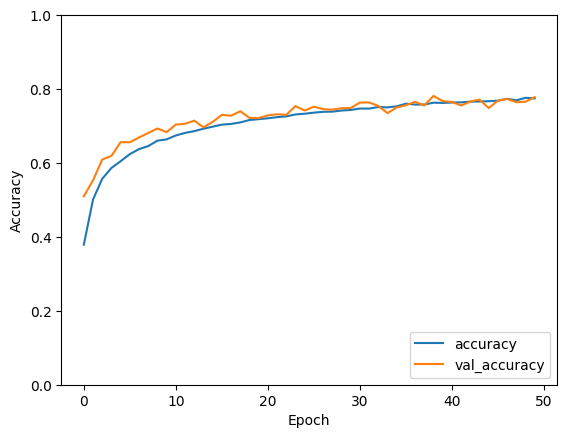

In [9]:
# Графік точності навчання та валідації
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

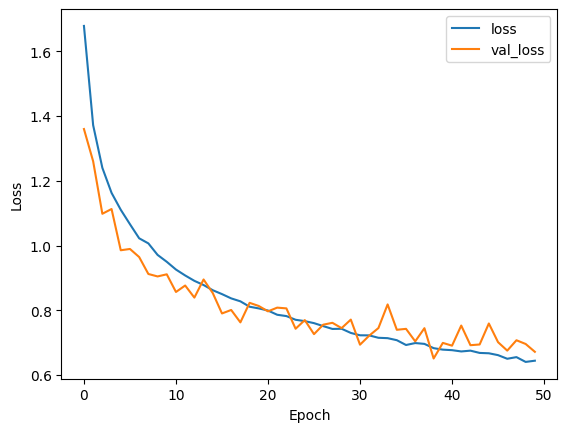

In [10]:
# Графік втрат навчання та валідації
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()